In [5]:
%pip install seaborn
%pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 9.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 48.9 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may n

In [51]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('../.experimentation_data/transactions.csv')

In [15]:
df.shape
df.isna().sum()


originUserId                                         0
timestamp                                            0
transactionId                                        0
transactionState                                     0
type                                                 0
originAmountDetails.transactionAmount                0
originAmountDetails.transactionCurrency              0
destinationAmountDetails.transactionAmount           0
destinationAmountDetails.transactionCurrency         0
tags.0.merchant_id                                   0
tags.1.merchant_name                                 0
originPaymentDetails.method                          0
originPaymentDetails.country                         0
originPaymentDetails.transactionReferenceField       0
originPaymentDetails.nameOnCard.firstName            0
originPaymentDetails.nameOnCard.lastName             0
originPaymentDetails.cardExpiry.month                0
originPaymentDetails.cardExpiry.year                 0
originPaym

In [16]:
df.drop('originPaymentDetails.merchantDetails.state', axis=1, inplace=True)
df.fillna('', inplace=True)

In [17]:
df.isna().sum()

originUserId                                      0
timestamp                                         0
transactionId                                     0
transactionState                                  0
type                                              0
originAmountDetails.transactionAmount             0
originAmountDetails.transactionCurrency           0
destinationAmountDetails.transactionAmount        0
destinationAmountDetails.transactionCurrency      0
tags.0.merchant_id                                0
tags.1.merchant_name                              0
originPaymentDetails.method                       0
originPaymentDetails.country                      0
originPaymentDetails.transactionReferenceField    0
originPaymentDetails.nameOnCard.firstName         0
originPaymentDetails.nameOnCard.lastName          0
originPaymentDetails.cardExpiry.month             0
originPaymentDetails.cardExpiry.year              0
originPaymentDetails.cardLast4Digits              0
originPaymen

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   originUserId                                    7349 non-null   object 
 1   timestamp                                       7349 non-null   float64
 2   transactionId                                   7349 non-null   object 
 3   transactionState                                7349 non-null   object 
 4   type                                            7349 non-null   object 
 5   originAmountDetails.transactionAmount           7349 non-null   float64
 6   originAmountDetails.transactionCurrency         7349 non-null   object 
 7   destinationAmountDetails.transactionAmount      7349 non-null   float64
 8   destinationAmountDetails.transactionCurrency    7349 non-null   object 
 9   tags.0.merchant_id                       

In [19]:
df.describe()

,timestamp,originAmountDetails.transactionAmount,destinationAmountDetails.transactionAmount,originPaymentDetails.transactionReferenceField,originPaymentDetails.cardExpiry.month,originPaymentDetails.cardExpiry.year,originPaymentDetails.cardLast4Digits,originPaymentDetails.merchantDetails.mcc
count,7.349000e+03,7349.000000,7.349000e+03,7.349000e+03,7349.00000,7349.000000,7349.000000,7349.00000
mean,1.696990e+09,1356.883454,7.137441e+03,2.473419e+18,6.16356,25.980950,5279.625936,5146.71656
std,8.365110e+06,5093.815210,1.609871e+05,1.035063e+17,1.58747,0.154471,2655.294343,1050.61237
min,1.671150e+09,0.000000,0.000000e+00,2.538134e+17,1.00000,25.000000,55.000000,3009.00000
25%,1.691057e+09,49.000000,2.500000e+01,2.405264e+18,5.00000,26.000000,3292.000000,4121.00000
50%,1.697156e+09,239.000000,2.150900e+02,2.475654e+18,6.00000,26.000000,5408.000000,5399.00000
75%,1.703272e+09,671.420000,6.960000e+02,2.546688e+18,7.00000,26.000000,6816.000000,5814.00000
max,1.712084e+09,111214.810000,1.274625e+07,2.648680e+18,12.00000,27.000000,9942.000000,9399.00000


In [21]:
# Transforming the 'timestamp' column
df['timestamp'] = df['timestamp'].astype(str).str.replace('.', '')
df['timestamp'] = (df['timestamp'] + '0000').str[:13]
df['timestamp'] = pd.to_numeric(df['timestamp'])

# Convert transformed string to numeric (integer)
df['timestamp'] = df['timestamp'].astype(int)

# Convert Unix milliseconds to datetime object if needed for further processing
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.weekday
df['log_origin_amount'] = np.log(df['originAmountDetails.transactionAmount'] + 1)  # adding 1 to avoid log(0)
df['log_destination_amount'] = np.log(df['destinationAmountDetails.transactionAmount'] + 1)  # adding 1 to avoid log(0)
df['user_avg_transaction'] = np.log(df.groupby('originUserId')['originAmountDetails.transactionAmount'].transform('mean'))

In [36]:
# define numerical & categorical columns
numeric_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical columns : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns : {}'.format(len(categorical_columns), categorical_columns))

We have 14 numerical columns : ['timestamp', 'originAmountDetails.transactionAmount', 'destinationAmountDetails.transactionAmount', 'originPaymentDetails.transactionReferenceField', 'originPaymentDetails.cardExpiry.month', 'originPaymentDetails.cardExpiry.year', 'originPaymentDetails.cardLast4Digits', 'originPaymentDetails.merchantDetails.mcc', 'datetime', 'hour', 'day_of_week', 'log_origin_amount', 'log_destination_amount', 'user_avg_transaction']

We have 19 categorical columns : ['originUserId', 'transactionId', 'transactionState', 'type', 'originAmountDetails.transactionCurrency', 'destinationAmountDetails.transactionCurrency', 'tags.0.merchant_id', 'tags.1.merchant_name', 'originPaymentDetails.method', 'originPaymentDetails.country', 'originPaymentDetails.nameOnCard.firstName', 'originPaymentDetails.nameOnCard.lastName', 'originPaymentDetails.cardType', 'originPaymentDetails.cardBrand', 'originPaymentDetails.merchantDetails.id', 'originPaymentDetails.merchantDetails.category', 'or

In [44]:
numeric_features = df[numeric_columns].copy()
numeric_features.drop(columns=['timestamp', 'originAmountDetails.transactionAmount', 'destinationAmountDetails.transactionAmount', 'originPaymentDetails.transactionReferenceField', 'originPaymentDetails.cardExpiry.month', 'originPaymentDetails.cardExpiry.year', 'originPaymentDetails.cardLast4Digits', 'originPaymentDetails.merchantDetails.mcc', 'datetime' ], inplace=True)

categorical_features = df[categorical_columns].copy()
categorical_features.drop(columns=['originUserId', 'tags.0.merchant_id', 'tags.1.merchant_name', 'originPaymentDetails.nameOnCard.firstName', 'originPaymentDetails.nameOnCard.lastName', 'originPaymentDetails.merchantDetails.id', 'tags.2.merchant_name' ], inplace=True)

numeric_features.head()


,hour,day_of_week,log_origin_amount,log_destination_amount,user_avg_transaction
0,12,0,5.509388,5.509388,5.675002
1,7,3,5.017280,5.017280,7.504192
2,10,5,0.000000,0.000000,6.937470
3,1,3,5.075174,5.075174,6.873085
4,16,1,0.000000,0.000000,7.181467


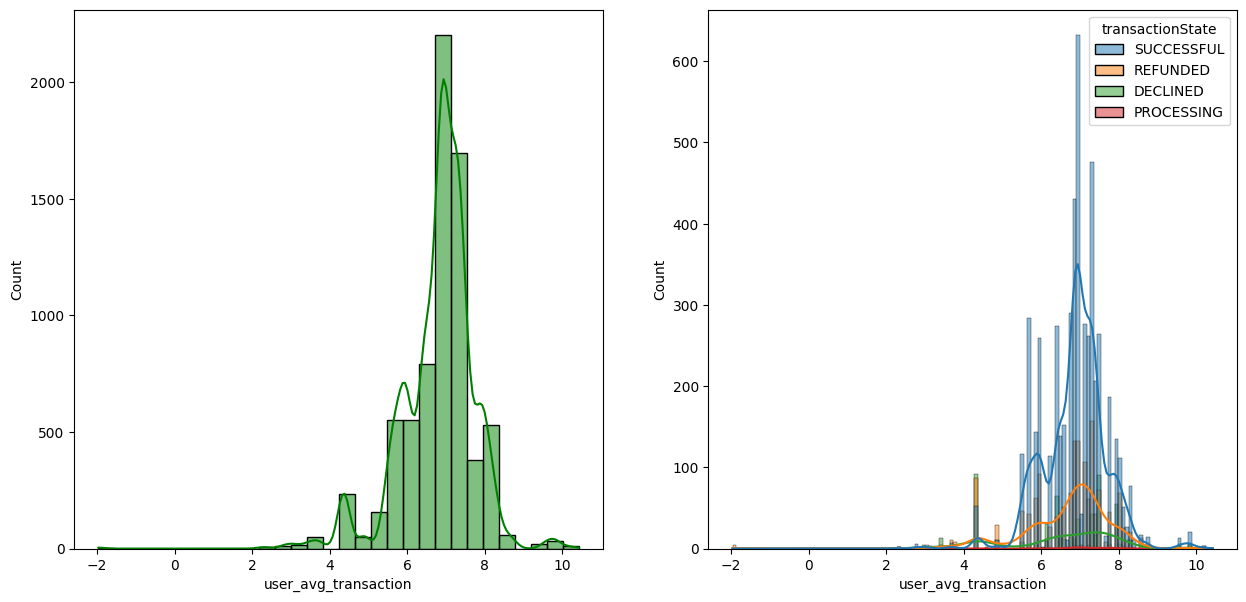

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='user_avg_transaction',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='user_avg_transaction',kde=True,hue='transactionState')
plt.show()

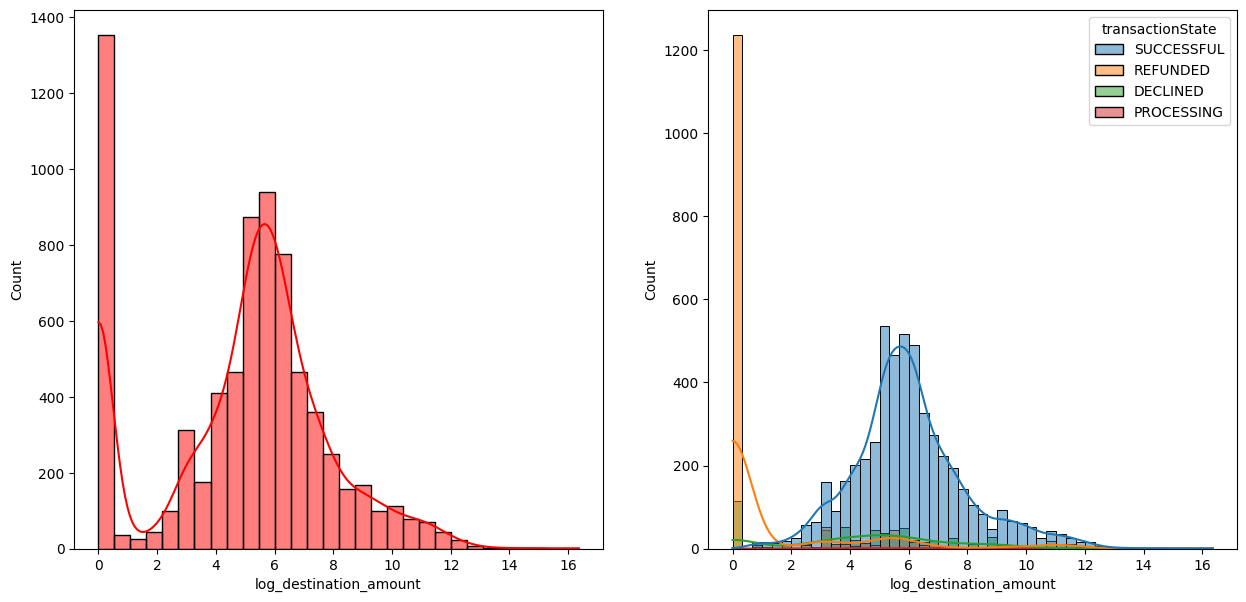

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='log_destination_amount',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='log_destination_amount',kde=True,hue='transactionState')
plt.show()